# How can we do transfer learning?

**Background:**

The purpose of this notebook is to transform a .wav file into a spectrogram and then feed it into a well known model such as InceptionV3 for feature generation

## Libraries and File Locations

In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import soundfile
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import specdisplay

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

In [4]:
test_file_dir = "../tests/wav/"

## Load sample WAV File

Loading in the form of melspectrograms

**MFCCs and Spectrograms**

In [61]:
n_mels = 128

In [62]:
n_windows = 500

In [79]:
test_png_file_name = 'sample_spectrogram.png'

In [63]:
samples, sample_rate = soundfile.read(test_file_dir+"hello.wav")

In [64]:
samples.shape

(66000, 4)

In [65]:
sample_channel_1 = samples[:,1]

In [66]:
hop_length = round(len(sample_channel_1)/n_windows)
hop_length

132

In [67]:
mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_1, 
                                                 sr=sample_rate,
                                                 n_fft=2048, 
                                                 hop_length=hop_length,
                                                 n_mels = n_mels,
                                                fmax = 8000)

In [68]:
mel_spectrogram.shape

(128, 501)

In [69]:
mel_spectrogram[:,:n_windows].shape

(128, 500)

Note that the below function (power_to_db) is equivalent to new: librosa.core.logamplitude

In [76]:
def extract_spectrogram(samples,sample_rate,n_windows=100,n_mels=23,n_fft=2048,fmax=8000):
    feature_set = []
    if samples.shape[1:]:
        channels = samples.shape[1:][0]
    else:
        channels = 1
        samples = np.expand_dims(samples, axis=1)
    for i in range(channels):
        sample_channel_x = samples[:,i]
        hop_length = round(len(sample_channel_x)/n_windows)
        mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_x, 
                                                     sr=sample_rate,
                                                     n_fft=n_fft, 
                                                     hop_length=hop_length,
                                                     n_mels = n_mels,
                                                    fmax = fmax
                                                        )
        decibel_spec = librosa.logamplitude(mel_spectrogram,ref_power=np.max)
        feature_set.append(decibel_spec)
    feature_set = np.array(feature_set)
    feature_set = np.mean(feature_set,axis=0)
    #[:,:n_windows]
    return feature_set

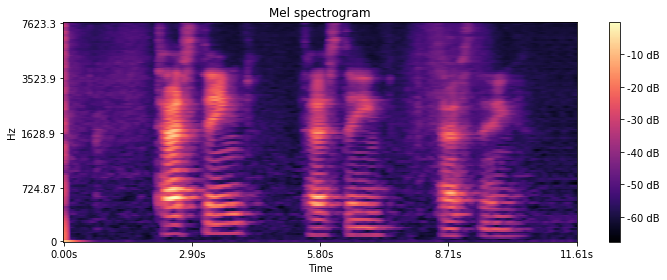

In [77]:
decibel_spec = extract_spectrogram(samples,sample_rate,n_windows=n_windows,n_mels=n_mels)
#decibel_spec = np.mean(features,axis=0)
plt.figure(figsize=(10, 4))
specdisplay.specshow(decibel_spec,
                          y_axis='mel', fmax=8000,
                          x_axis='time',freq_fmt = 'Hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [80]:
fig = plt.figure(figsize=(10,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
specdisplay.specshow(decibel_spec,
                          y_axis='mel', fmax=8000,
                          x_axis='frames',freq_fmt = 'Hz')

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
# Make the figure layout compact


plt.savefig(test_png_file_name)
plt.close()

# Copy this to literally create all the images we need

[https://medium.com/deepdeploy/transfer-learning-for-sound-classification-c9696c931f7d](https://medium.com/deepdeploy/transfer-learning-for-sound-classification-c9696c931f7d)

## Feed into InceptionV3

Follow this [https://www.kaggle.com/kmader/transfer-learning-with-inceptionv3](https://www.kaggle.com/kmader/transfer-learning-with-inceptionv3)